## 1.3.11 Эмперическая функция распределения

**Задание**

Из генеральной совокупности получена выборка:
`1.08, 0.19, 0.14, 0.27, 0.10, 0.38, 0.14, 0.23, 0.14, 0.50`

Найдите значение выборочной функции распределения в точке $0.25$.

In [1]:
import numpy as np
a = np.array([1.08, 0.19, 0.14, 0.27, 0.10, 0.38, 0.14, 0.23, 0.14, 0.50])
a.sort()
len(a[a<=0.25])/len(a)

0.6

## 1.3.12 Теорема Гливенко-Кантелли

Сопоставьте семейство распределений и выборочную функцию распределения, построенную по выборке, полученной из генеральной совокупности с распределением из соответствующего семейства


In [2]:
import matplotlib.pyplot as plt

In [3]:
font_options = {'family' : 'monospace'}
figure_options = {'figsize':[17,10]}
plt.rc('font', **font_options) 
plt.rc('figure', **figure_options)

In [4]:
import itertools
products = list(itertools.product(range(2),range(2)))

def f(distribution, k = 2, n =100):
    x,y  = np.array([]),np.array([])
    for i in range(1,k):
        arr = {distribution == 'normal': np.random.normal(0,1,n),distribution == 'poisson': np.random.poisson(5,n),\
              distribution == 'exp': np.random.exponential(5,n),distribution == 'uniform': np.random.uniform(0,1,n)}[1]
        arr.sort()
        lmb = lambda xi : len(arr[arr < xi])
        x = np.concatenate((x,arr))
        y = np.concatenate((y,np.array(list(map(lmb, arr))) / len(arr)))
    return x, y

for i in ['poisson','uniform','normal','exp']:
    exec("%s, %s = f(distribution = '%s')" % ('x_'+i,'y_'+i,i))

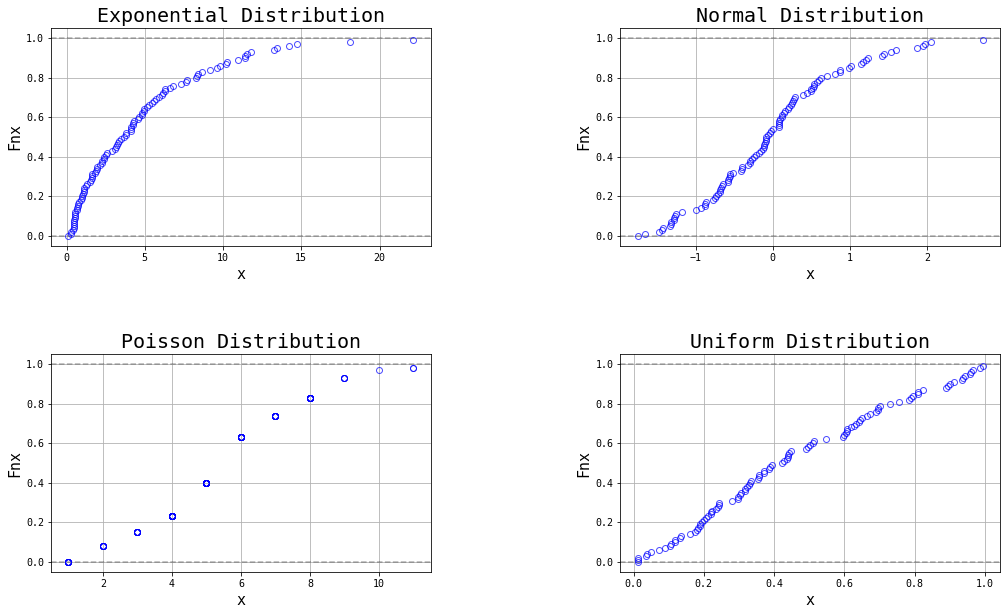

In [5]:
fig, ax = plt.subplots(2,2)


np.array(list(map(lambda x: (ax[x[0],x[1]].set_xlabel('x',fontsize=15), \
                             ax[x[0],x[1]].set_ylabel('Fnx',fontsize=15)),products)))

np.array(list(map(lambda x: (ax[x[0],x[1]].grid(),ax[x[0],x[1]].axhline(y=0, color='k',alpha = 0.3,ls = '--'), \
                             ax[x[0],x[1]].axhline(y=1, color='k',alpha = 0.3,ls = '--')),products)))

ax[0,0].plot(x_exp,y_exp, marker = 'o',color = 'blue',alpha = 0.7, markerfacecolor='None', linestyle = 'None')
ax[0,0].set_title('Exponential Distribution', fontsize = 20)

ax[0,1].plot(x_normal,y_normal, marker = 'o',color = 'blue',alpha = 0.7, markerfacecolor='None', linestyle = 'None')
ax[0,1].set_title('Normal Distribution', fontsize = 20)

ax[1,0].plot(x_poisson,y_poisson, marker = 'o',color = 'blue',alpha = 0.7, markerfacecolor='None', linestyle = 'None')
ax[1,0].set_title('Poisson Distribution', fontsize = 20)

ax[1,1].plot(x_uniform,y_uniform, marker = 'o',color = 'blue',alpha = 0.7, markerfacecolor='None', linestyle = 'None')
ax[1,1].set_title('Uniform Distribution', fontsize = 20)

plt.subplots_adjust(wspace=0.5, hspace=0.5)

plt.show()